In [23]:
import numpy as np
from pyhmc import hmc
import matplotlib.pyplot as plt
import time
import seaborn as sns
import pystan
from autograd import jacobian

# Pyhmc for first example

In [32]:
def logprob(theta):
    logp = 2 * theta**2 - theta**4
    grad= 4 * theta - 4 * theta**3
    return logp, grad

theta0=np.array([0])

samples=hmc(logprob,x0=theta0,n_samples=6000)

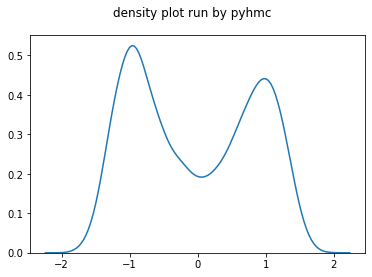

In [33]:
plot1=sns.distplot(samples,kde=True,hist=False)
plt.suptitle("density plot run by pyhmc")
fig1=plot1.get_figure()
fig1.savefig("example1_pyhmc.png")

# pyhmc for second example

In [38]:
#set the prior mu as N(0,10)
sgmsq=10

#compute grad log pdf
def mn_glpdf(y,mu):
    exp1=np.exp(-0.5*(y-mu[0])**2)
    exp2=np.exp(-0.5*(y-mu[1])**2)
    v = np.c_[exp1*(y-mu[0]),exp2*(y-mu[1])]
    return np.sum(v/(exp1+exp2),axis=0)

#compute grad log prior
def mn_glpr(mu):
    return -(np.sum(mu)/sgmsq)

#compute log(theta)
def log_prior(theta):
        return(-(1/(2*sgmsq))*np.sum(theta**2))

#compute logp(x\theta)
def log_lik(theta, x):
        return(np.log(0.5/np.sqrt(2*np.pi)*(np.exp(-0.5*(theta[0]-x)**2) + np.exp(-0.5*(theta[1]-x)**2))))

#the function of U(theta)    
def U(theta, x):
        return(-log_prior(theta) - np.sum(log_lik(theta, x)))

#set up the initial value
theta = np.array([-3.0, 3.0])
theta_0 = theta 
n = 200
x = np.r_[np.random.normal(theta[0], 1, (n,1)),np.random.normal(theta[1], 1, (n,1))]



def logprob(theta,y):
    logp = U(theta, y)
    gradu = -(mn_glpdf(y,theta)+mn_glpr(theta))
    return logp, gradu

samps_hmc = hmc(logprob, x0=theta_0, n_samples=6000,args=([x]),epsilon=0.01)


/opt/conda/lib/python3.6/site-packages/seaborn/distributions.py:679: UserWarning: Passing a 2D dataset for a bivariate plot is deprecated in favor of kdeplot(x, y), and it will cause an error in future versions. Please update your code.
  warnings.warn(warn_msg, UserWarning)


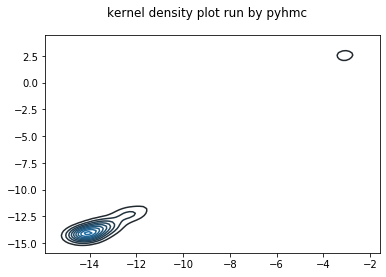

In [37]:
plot2=sns.kdeplot(samps_hmc)
plt.suptitle("kernel density plot run by pyhmc")
fig2=plot2.get_figure()
fig2.savefig("example2_pyhmc.png")